# Mediana

Definida para variables continuas así:

- $\theta$ tal que $F_X{\theta} = \frac{1}{2}$

y para variables discretas así:

- $\theta$ tal que $P(X  \leq \theta) \geq \frac{1}{2}$ y $P(X  \geq \theta) \geq \frac{1}{2}$

**Nota:** En el caso de una variable discreta, es posible que la mediana no sea única.

In [2]:
n=21
p=0.5
x=seq(0, n, by=1)
prob_acum=pbinom(x, n, p)                         # P (X<= x)
prob_acum2=pbinom(x-1, n, p, lower.tail=FALSE)    # P (X>=x)
cbind(x, round(prob_acum,4), round(prob_acum2,4))[9:12,]

x,,
8,0.1917,0.9054
9,0.3318,0.8083
10,0.5000,0.6682
11,0.6682,0.5000


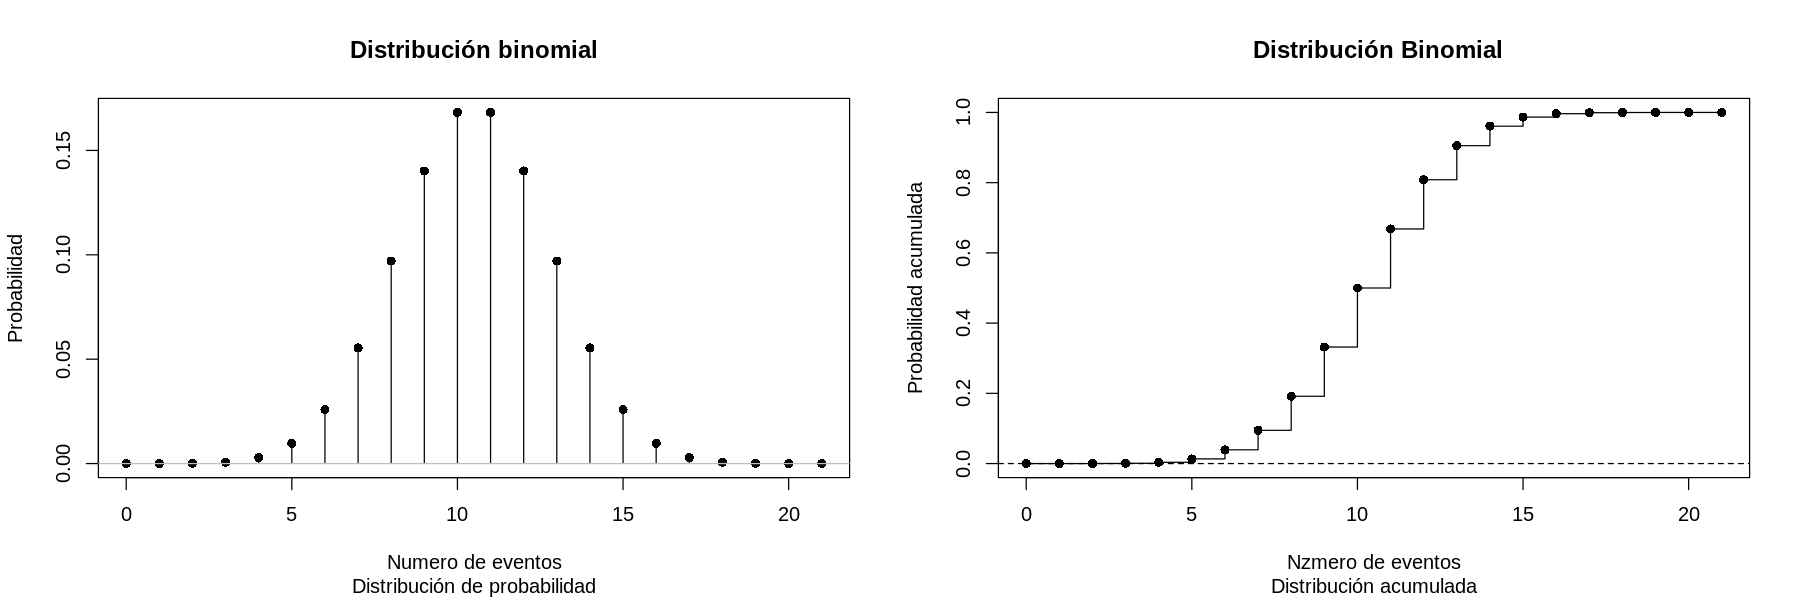

In [9]:
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow = c(1,2))
plot(x, dbinom(x, size=n, prob=p), xlab="Numero de eventos",
     ylab="Probabilidad", main="Distribución binomial", type="h",
     sub = 'Distribución de probabilidad')
points(x, dbinom(x, size=n, prob=p), pch=16, col=1)
abline(h=0, col="grey")
x <- rep(x, rep(2, length(x)))
plot(x[-1], pbinom(x, size=n, prob=p)[-length(x)], xlab="Nzmero de eventos",
     ylab="Probabilidad acumulada", main=" Distribución Binomial", type="l",
     sub = 'Distribución acumulada')
abline(h=0, col=1, lty=2)
x <- 0:n
points(x, pbinom(x, size=n, prob=p), pch=16)

# **Test del signo y test de Wilcoxon**

Son como la generalización de la prueba t de Student para diferencia de medias libre de supuestos distribucionales. Recuerde que la estadística t tiene la siguiente forma:

$$t = \frac{\bar{X} - \mu_0}{S / \sqrt{n}}$$

siempre que sepamos que nuestra población tenga distribución normal.

**Nota:** Generalmente las distribuciones $F$, $\chi^2$, normal y t de Student son utilizadas para generar inferencia distinto a las distribuciones que tienen las variables aleatorias que estamos estudiando.

## **Test del signo:**

- Una prueba de hipotésis para la mediana.

**PREGUNTA:** En el caso de presentarse varias medianas qué hariámos????

- Se tiene una muestra $X_1, X_2, \cdots, X_n$ aleatoria de $X$.

- El sistema de hipotésis queda conformado como:

$$ \begin{cases}
  H_0: \theta = \theta_0  \\
  H_1: \theta \not= \theta_0 | \theta \leq \theta_0 | \theta \geq \theta_0  
\end{cases}$$

> Equivalentemente el sistema de hipotésis puede representarse como:
> $$\begin{cases} H_0: \theta_y = 0 \\ H_1: \theta_y  \not= 0\end{cases}$$
> siempre que definamos a $\theta_y$ como la mediana de la variable aleatoria $Y$ definida como $Y_i = X_i - \theta$

Definimos además:

$$ \psi_i =
\begin{cases}
1 & Y_i > 0 \\
0 & Y_i < 0
\end{cases}$$


### **Estadística:**

Bajo $H_0$ se tendrá que $P(\psi_i = 1) = \frac{1}{2}$. Por lo que armamos la siguiente estadística:

$$S = \sum_{i = 1}^n \psi_i \sim Bin(n, \frac{1}{2})$$

### **Región de rechazo:**

- Para $H_1: \theta_y > 0$ se rechaza si $S \geq binom_{(1- \alpha, n, \frac{1}{2})}$

**Nota:** Se puede aproximar a la binomial con una normal en esta prueba.

**Nota:** Es importante que la mediana en este caso siempre se corrija para que quede cero o que la condición de la variable $\psi$ no quede centrada alrededor de cero o de lo contrario la prueba cambiará.